ID                                                                                                               0.000000
stg_selling_price_val                                                                                            6.288079
rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available                                    11.265663
supplier_funding_perc                                                                                            0.160938
rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available                             0.597770
is_gondola                                                                                                       0.000000
rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available                                     14.978733
rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available                                             0.505805
rolling_sum_180_baseline

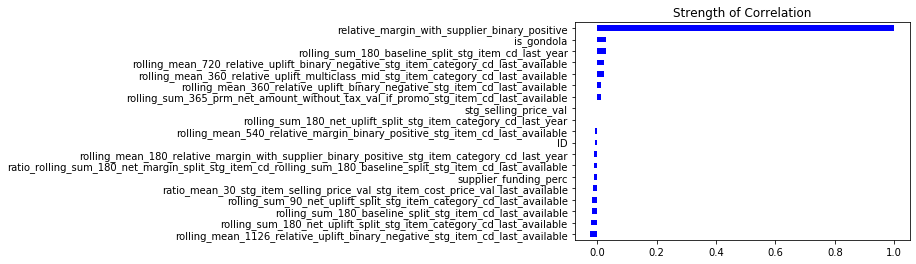

In [57]:
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

dataset_train = pd.read_csv('retail_syn_hackathon_full.csv')
dataset_train = dataset_train.drop(["ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year", "ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available"], axis=1)
# dataset_train = dataset_train.dropna(axis='columns')
print(dataset_train.isnull().mean() * 100)
dataset_train = dataset_train.dropna()
dataset_train = dataset_train.astype('float32')
corr = dataset_train.corrwith(dataset_train['relative_margin_with_supplier_binary_positive'])
corr.sort_values().plot.barh(color = 'blue',title = 'Strength of Correlation')



Text(0.5, 1.0, 'Negative (0) vs. Positive (1)')

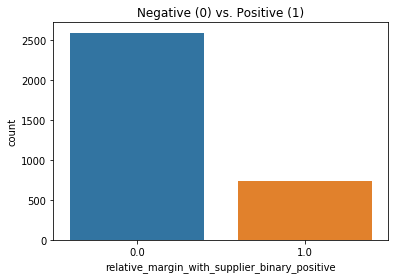

In [58]:
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.spatial import distance

# taking a closer look at the class variable
sns.countplot('relative_margin_with_supplier_binary_positive', data = dataset_train)
plt.title('Negative (0) vs. Positive (1)')

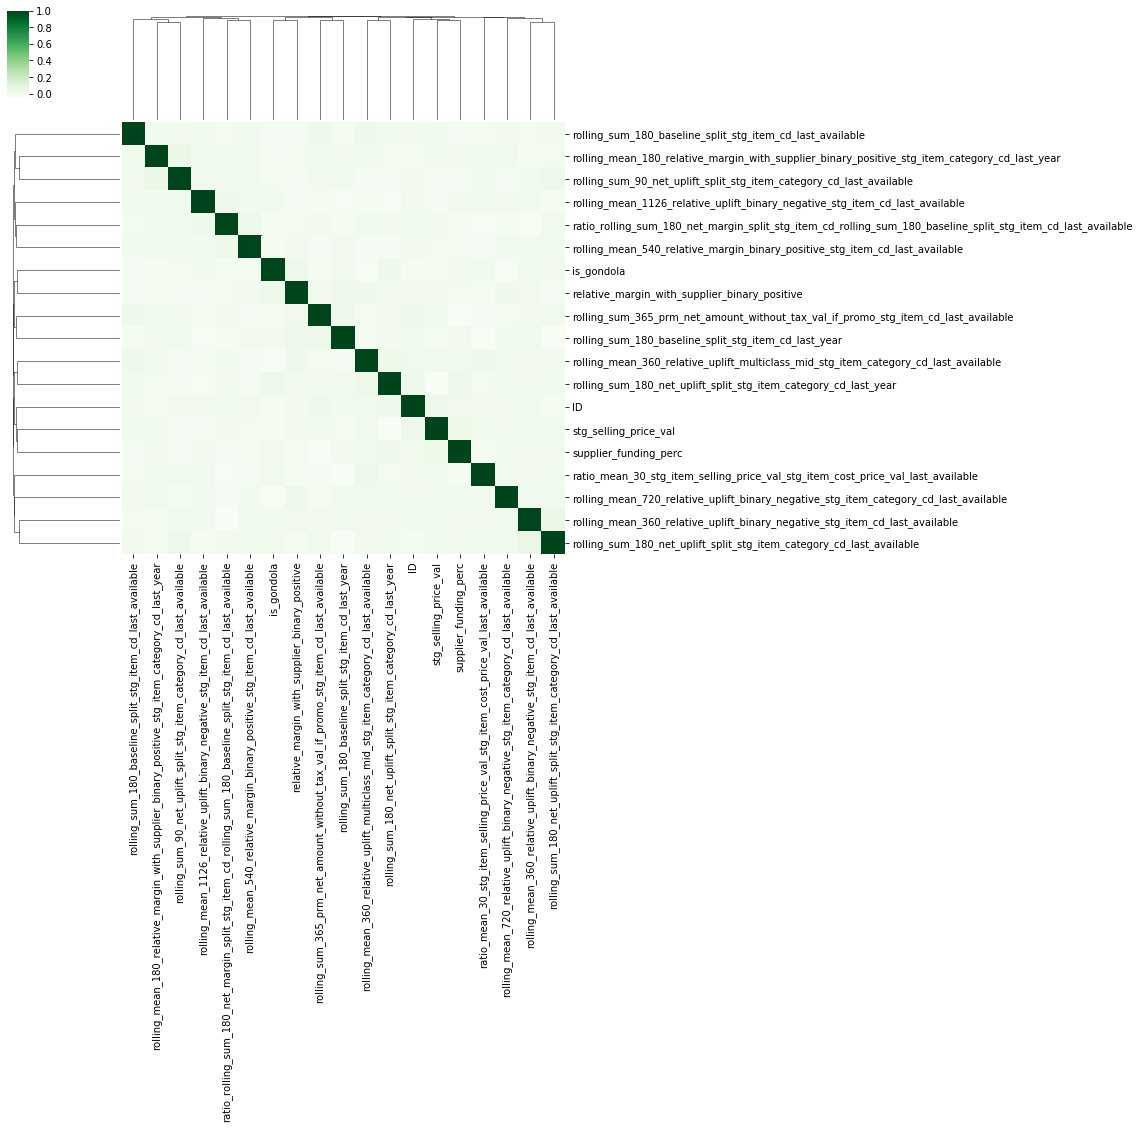

In [59]:
corr_matrix = dataset_train.corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,row_cluster=True,col_cluster=True,figsize=(10,10),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns

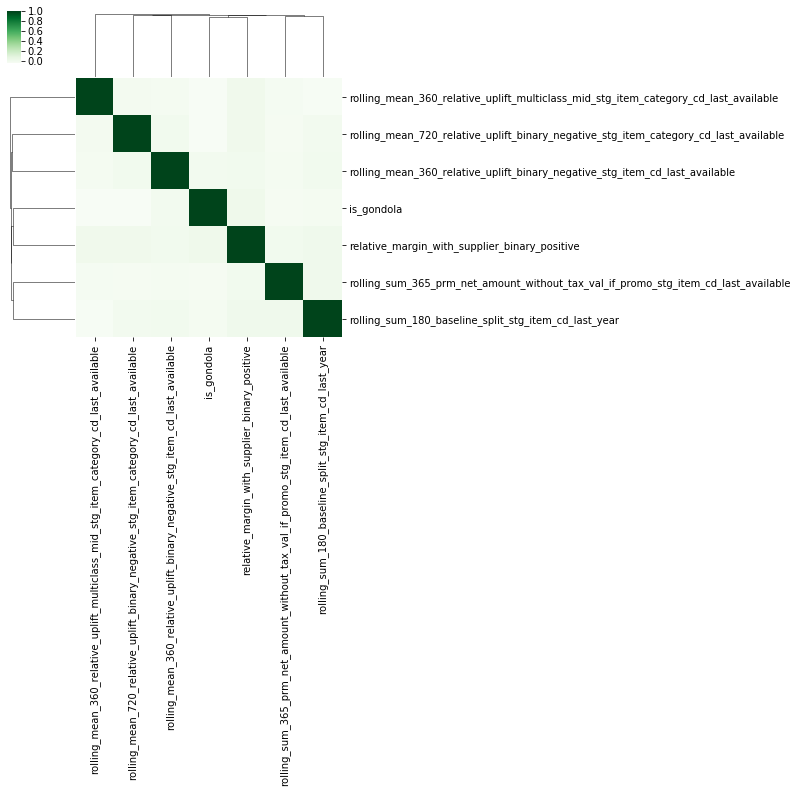

Correlation Strength:
relative_margin_with_supplier_binary_positive    1.0
dtype: float64


In [60]:
correlated_features = corr[corr>0.00].index.tolist()
corr_matrix = dataset_train[correlated_features].corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), \
                            method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,\
                   row_cluster=True,col_cluster=True,figsize=(6,6),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns
print("Correlation Strength:")
print(corr[corr>0.1].sort_values(ascending=False))

In [61]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

         ID  \
0         1   
1         2   
2         3   
3         4   
4         5   
5         6   
6         7   
7         8   
8         9   
9        10   
10       11   
11       12   
12       13   
13       14   
14       15   
15       16   
16       17   
17       18   
18       19   
19       20   
20       21   
21       22   
22       23   
23       24   
24       25   
25       26   
26       27   
27       28   
28       29   
29       30   
...     ...   
8669  10844   
8670  10845   
8671  10846   
8672  10847   
8673  10848   
8674  10849   
8675  10850   
8676  10851   
8677  10852   
8678  10853   
8679  10854   
8680  10855   
8681  10856   
8682  10857   
8683  10858   
8684  10859   
8685  10860   
8686  10861   
8687  10862   
8688  10863   
8689  10864   
8690  10865   
8691  10866   
8692  10867   
8693  10868   
8694  10869   
8695  10870   
8696  10871   
8697  10872   
8698  10873   

      ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_

[0]	validation_0-error:0.255053	validation_0-rmse:0.495052	validation_1-error:0.282759	validation_1-rmse:0.497321
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 200 rounds.
[1]	validation_0-error:0.20537	validation_0-rmse:0.489991	validation_1-error:0.291954	validation_1-rmse:0.49499
[2]	validation_0-error:0.190866	validation_0-rmse:0.484456	validation_1-error:0.28046	validation_1-rmse:0.492299
[3]	validation_0-error:0.18616	validation_0-rmse:0.480852	validation_1-error:0.278161	validation_1-rmse:0.490274
[4]	validation_0-error:0.177673	validation_0-rmse:0.475289	validation_1-error:0.271264	validation_1-rmse:0.487365
[5]	validation_0-error:0.174819	validation_0-rmse:0.470242	validation_1-error:0.25977	validation_1-rmse:0.485406
[6]	validation_0-error:0.167567	validation_0-rmse:0.46669	validation_1-error:0.255172	validation_1-rmse:0.483558
[7]	validation_0-error:0.166332	validation_0-rms

[71]	validation_0-error:0.13933	validation_0-rmse:0.337506	validation_1-error:0.23908	validation_1-rmse:0.433714
[72]	validation_0-error:0.137865	validation_0-rmse:0.336393	validation_1-error:0.23908	validation_1-rmse:0.43357
[73]	validation_0-error:0.137942	validation_0-rmse:0.335236	validation_1-error:0.23908	validation_1-rmse:0.43313
[74]	validation_0-error:0.137556	validation_0-rmse:0.334393	validation_1-error:0.241379	validation_1-rmse:0.432756
[75]	validation_0-error:0.136707	validation_0-rmse:0.333393	validation_1-error:0.23908	validation_1-rmse:0.432378
[76]	validation_0-error:0.136784	validation_0-rmse:0.332518	validation_1-error:0.23908	validation_1-rmse:0.432513
[77]	validation_0-error:0.13717	validation_0-rmse:0.331862	validation_1-error:0.23908	validation_1-rmse:0.432614
[78]	validation_0-error:0.136707	validation_0-rmse:0.330832	validation_1-error:0.236782	validation_1-rmse:0.432199
[79]	validation_0-error:0.136476	validation_0-rmse:0.330108	validation_1-error:0.236782	va

[143]	validation_0-error:0.111017	validation_0-rmse:0.288745	validation_1-error:0.227586	validation_1-rmse:0.42457
[144]	validation_0-error:0.110785	validation_0-rmse:0.288173	validation_1-error:0.227586	validation_1-rmse:0.424521
[145]	validation_0-error:0.110477	validation_0-rmse:0.287758	validation_1-error:0.227586	validation_1-rmse:0.424441
[146]	validation_0-error:0.109782	validation_0-rmse:0.287008	validation_1-error:0.227586	validation_1-rmse:0.424457
[147]	validation_0-error:0.109628	validation_0-rmse:0.286493	validation_1-error:0.229885	validation_1-rmse:0.42447
[148]	validation_0-error:0.108857	validation_0-rmse:0.286	validation_1-error:0.229885	validation_1-rmse:0.424467
[149]	validation_0-error:0.108548	validation_0-rmse:0.285432	validation_1-error:0.229885	validation_1-rmse:0.42431
[150]	validation_0-error:0.108239	validation_0-rmse:0.285046	validation_1-error:0.229885	validation_1-rmse:0.424533
[151]	validation_0-error:0.107468	validation_0-rmse:0.284517	validation_1-erro

[214]	validation_0-error:0.0817	validation_0-rmse:0.255803	validation_1-error:0.236782	validation_1-rmse:0.422265
[215]	validation_0-error:0.080929	validation_0-rmse:0.255228	validation_1-error:0.236782	validation_1-rmse:0.422329
[216]	validation_0-error:0.08008	validation_0-rmse:0.254869	validation_1-error:0.236782	validation_1-rmse:0.422359
[217]	validation_0-error:0.079926	validation_0-rmse:0.25436	validation_1-error:0.236782	validation_1-rmse:0.422385
[218]	validation_0-error:0.079	validation_0-rmse:0.253923	validation_1-error:0.236782	validation_1-rmse:0.422533
[219]	validation_0-error:0.078846	validation_0-rmse:0.253537	validation_1-error:0.236782	validation_1-rmse:0.422412
[220]	validation_0-error:0.07846	validation_0-rmse:0.252998	validation_1-error:0.236782	validation_1-rmse:0.42236
[221]	validation_0-error:0.07846	validation_0-rmse:0.25275	validation_1-error:0.236782	validation_1-rmse:0.422152
[222]	validation_0-error:0.07846	validation_0-rmse:0.25252	validation_1-error:0.236

[285]	validation_0-error:0.053464	validation_0-rmse:0.228134	validation_1-error:0.234483	validation_1-rmse:0.421723
[286]	validation_0-error:0.053387	validation_0-rmse:0.227938	validation_1-error:0.234483	validation_1-rmse:0.421662
[287]	validation_0-error:0.05277	validation_0-rmse:0.227445	validation_1-error:0.234483	validation_1-rmse:0.421541
[288]	validation_0-error:0.051998	validation_0-rmse:0.227221	validation_1-error:0.234483	validation_1-rmse:0.421687
[289]	validation_0-error:0.051304	validation_0-rmse:0.226717	validation_1-error:0.232184	validation_1-rmse:0.421543
[290]	validation_0-error:0.050764	validation_0-rmse:0.226332	validation_1-error:0.232184	validation_1-rmse:0.421379
[291]	validation_0-error:0.050841	validation_0-rmse:0.226087	validation_1-error:0.232184	validation_1-rmse:0.421342
[292]	validation_0-error:0.049452	validation_0-rmse:0.225471	validation_1-error:0.232184	validation_1-rmse:0.421197
[293]	validation_0-error:0.048989	validation_0-rmse:0.225159	validation_1

[356]	validation_0-error:0.032402	validation_0-rmse:0.204412	validation_1-error:0.23908	validation_1-rmse:0.422898
[357]	validation_0-error:0.032557	validation_0-rmse:0.204237	validation_1-error:0.23908	validation_1-rmse:0.422843
[358]	validation_0-error:0.032325	validation_0-rmse:0.20411	validation_1-error:0.23908	validation_1-rmse:0.422799
[359]	validation_0-error:0.032171	validation_0-rmse:0.203927	validation_1-error:0.23908	validation_1-rmse:0.422717
[360]	validation_0-error:0.031862	validation_0-rmse:0.203631	validation_1-error:0.23908	validation_1-rmse:0.422832
[361]	validation_0-error:0.031399	validation_0-rmse:0.203309	validation_1-error:0.23908	validation_1-rmse:0.422879
[362]	validation_0-error:0.031014	validation_0-rmse:0.203027	validation_1-error:0.23908	validation_1-rmse:0.422921
[363]	validation_0-error:0.030705	validation_0-rmse:0.2026	validation_1-error:0.241379	validation_1-rmse:0.422925
[364]	validation_0-error:0.030937	validation_0-rmse:0.202207	validation_1-error:0.

[427]	validation_0-error:0.018207	validation_0-rmse:0.181607	validation_1-error:0.236782	validation_1-rmse:0.423122
[428]	validation_0-error:0.018053	validation_0-rmse:0.181135	validation_1-error:0.23908	validation_1-rmse:0.423144
[429]	validation_0-error:0.017898	validation_0-rmse:0.180846	validation_1-error:0.236782	validation_1-rmse:0.423293
[430]	validation_0-error:0.017898	validation_0-rmse:0.180702	validation_1-error:0.236782	validation_1-rmse:0.423264
[431]	validation_0-error:0.017821	validation_0-rmse:0.180577	validation_1-error:0.236782	validation_1-rmse:0.42331
[432]	validation_0-error:0.018053	validation_0-rmse:0.180214	validation_1-error:0.236782	validation_1-rmse:0.423532
[433]	validation_0-error:0.01759	validation_0-rmse:0.179813	validation_1-error:0.236782	validation_1-rmse:0.42372
[434]	validation_0-error:0.017358	validation_0-rmse:0.17943	validation_1-error:0.234483	validation_1-rmse:0.423471
[435]	validation_0-error:0.01759	validation_0-rmse:0.179052	validation_1-erro

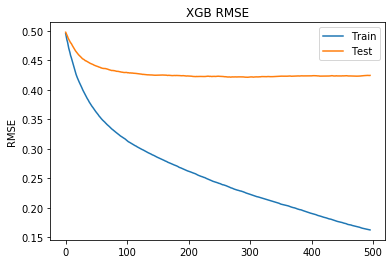

In [79]:
import xgboost as xgb

from sklearn.model_selection  import train_test_split



dataset_train = pd.read_csv('retail_syn_hackathon_full.csv')
dataset_train = dataset_train.fillna(0)
dataset_train = dataset_train.drop([], axis=1)
X = dataset_train.iloc[:, :-1]
Y = dataset_train.iloc[:, -1]

print(X)

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.05, stratify=Y, random_state=0)


from imblearn.over_sampling import SMOTE

# applying SMOTE to our data and checking the class counts
train_X, train_Y = SMOTE().fit_resample(train_X, train_Y)


# from imblearn.under_sampling import ClusterCentroids
# cc = ClusterCentroids(ratio={0:3942})
# train_X, train_Y = cc.fit_sample(train_X, train_Y)
# plot_2d_space(train_X, train_Y, 'Cluster Centroids under-sampling')

df = pd.DataFrame(train_Y)
df.columns = ['pred']

print(df['pred'].value_counts())




model = xgb.XGBClassifier(max_depth=8, min_child_weight=0.26, subsample=0.5 ,gamma = 0.1, colsample_bytree=0.8, objective='binary:logistic',n_estimators=100000,learning_rate = 0.03)
eval_set = [(train_X, train_Y), (test_X.values, test_Y.values)]

model.fit(train_X, train_Y, early_stopping_rounds = 200, eval_metric=["error", "rmse"], eval_set=eval_set, verbose=1)

results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGB RMSE')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

dataset_train2 = pd.read_csv('retail_phase3_testdata.csv')
dataset_train2 = dataset_train2.fillna(0)
dataset_train = dataset_train.drop([], axis=1)

y_pred = model.predict(dataset_train2.values)
predictions = [round(value) for value in y_pred]

print(np.sum(predictions))
print(len(predictions))
print(np.sum(predictions)/len(predictions))

# evaluate predictions
# accuracy = accuracy_score(test_Y, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(predictions)



# from sklearn.metrics import confusion_matrix 
# results = confusion_matrix(test_Y, predictions)
# print(results)

In [89]:
data = pd.DataFrame(predictions, columns=["abc"])

data.to_csv('temp.csv')

In [75]:
# Grid search

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

# A parameter grid for XGBoost
params = {
        'learning_rate': np.linspace(0,1,num=101),
        'min_child_weight': np.linspace(0,1,num=101),
        'gamma': np.linspace(0,5,num=101),
        'subsample': np.linspace(0,1,num=11),
        'colsample_bytree': np.linspace(0,1,num=11),
        'max_depth': [1,2,3,4,5,6,7,8,9,10]
        }

xgb = XGBClassifier(n_estimators=600, objective='binary:logistic', silent=True, nthread=1)

folds = 10
param_comb = 10 

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(train_X, train_Y), verbose=3, random_state=1001 )

random_search.fit(train_X, train_Y)

print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   44.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  6.4min finished



 All results:
{'mean_fit_time': array([ 3.04137557,  8.86895392,  6.71658297, 26.26814048,  5.13064024,
       22.02840376, 36.92660282, 11.60598369, 11.44921162, 18.61901522]), 'std_fit_time': array([0.11819411, 0.1522725 , 0.10307872, 0.33747964, 0.11601461,
       0.42981947, 2.1212952 , 0.3498291 , 0.21440325, 0.54594192]), 'mean_score_time': array([0.01115928, 0.03654404, 0.02759955, 0.05478199, 0.03897393,
       0.0744761 , 0.09909046, 0.03904068, 0.06334684, 0.13970063]), 'std_score_time': array([0.00326685, 0.00497418, 0.00631161, 0.00699185, 0.00651829,
       0.01290018, 0.00656848, 0.00408921, 0.00611841, 0.01032351]), 'param_subsample': masked_array(data=[0.0, 0.9, 0.6000000000000001, 0.7000000000000001, 0.8,
                   0.5, 0.30000000000000004, 0.9, 0.4, 0.2],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[0.

In [78]:
from sklearn.model_selection import StratifiedKFold

acc_arr = []
X_values = X.values
Y_values = Y.values

# print(type())

skf = StratifiedKFold(n_splits=10, shuffle=True)# Loop through the indices the split() method returns
for index, (train_indices, test_indices) in enumerate(skf.split(X_values, Y_values)):
#     print ("Training on fold " + str(index+1) + "/10...")    # Generate batches from indices
#     print (index, train_indices, test_indices)
    xtrain, xtest = X_values[train_indices], X_values[test_indices]
    ytrain, ytest = Y_values[train_indices], Y_values[test_indices]
    
    # TODO Oversample xtrain and ytrain
    
    # Clear model, and create it
    
    from imblearn.over_sampling import SMOTE
    # applying SMOTE to our data and checking the class counts
    train_X, train_Y = SMOTE().fit_resample(xtrain, ytrain)

#     from imblearn.under_sampling import ClusterCentroids
    # cc = ClusterCentroids(ratio={1:4})
    # train_X, train_Y = cc.fit_sample(train_X, train_Y)
    # plot_2d_space(train_X, train_Y, 'Cluster Centroids under-sampling')


    model = xgb.XGBClassifier(max_depth=5, min_child_weight=0.1, subsample=0.7 ,gamma = 3.15, colsample_bytree=0.8, objective='binary:logistic',n_estimators=100000,learning_rate = 0.05)
    eval_set = [(xtrain, ytrain), (xtest, ytest)]

    model.fit(xtrain, ytrain, early_stopping_rounds = 50, eval_metric=["error", "rmse"], eval_set=eval_set, verbose=1)
    
    y_pred = model.predict(xtest)
    predictions = [round(value) for value in y_pred]
    
    eval_acc = accuracy_score(ytest, predictions)
    print(index, eval_acc)
    acc_arr.append(eval_acc)

AttributeError: 'XGBClassifier' object has no attribute 'XGBClassifier'

In [72]:
print(acc_arr)

[0.7841561423650976, 0.7841561423650976, 0.7839080459770115, 0.7839080459770115, 0.7839080459770115, 0.7839080459770115, 0.7839080459770115, 0.7848101265822784, 0.7848101265822784, 0.7848101265822784]
